In [3]:
# ID2024103121181842653169
# ID202411022317366622277
import pandas as pd
from tshpo.lib_class import AnaHelper

files = [
    "c08_tshpo_number_epoch_small_datasets_v1_original_20241102_1420.csv.gz",
]

iterations = [100, 200, 400, 800, 1000, 2000, 3000, 4000, 4500, 5000]
t_df = []
for _f in files:
    t_df.append(AnaHelper.load_exp_from_csv_tshpo(_f, iterations=iterations))

process_df = pd.concat(t_df)
process_df

,Unnamed: 0,id,default_max,default_min,status,#instances,model_training_time,data_processing_time,walk_time,t__stopwatch_,...,metric_100,metric_200,metric_400,metric_800,metric_1000,metric_2000,metric_3000,metric_4000,metric_4500,metric_5000
0,0,d0c38107d07021ea2d850d978aad2db0,0.7635,0.2200,success,5000,3269.9180,0.0268,3274.18,3274.469233,...,0.7011,0.7143,0.7143,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800
1,0,d03b5cbbecc2c84053268353c7b5821f,0.7619,0.1979,success,5000,1373.8453,0.0019,1377.15,1377.668856,...,0.8021,0.8021,0.8021,0.8021,0.8021,0.8021,0.8021,0.8021,0.8021,0.8021
2,0,dfb8f6d01977ee05621eeb591a1d5678,0.7274,0.2332,success,5000,3195.5669,0.0026,3199.78,3200.312501,...,0.7553,0.7553,0.7553,0.7553,0.7553,0.7586,0.7652,0.7668,0.7668,0.7668
3,0,b3da24ad0568b8a7bd95234794db7025,0.7159,0.2775,success,5000,1381.0253,0.0022,1384.55,1385.500475,...,0.7143,0.7143,0.7143,0.7176,0.7176,0.7192,0.7209,0.7209,0.7209,0.7225
4,0,7bbcdbe3593fe22b7a5a56143a24cf21,0.7274,0.1987,success,5000,2169.3229,0.0017,2172.32,2172.600839,...,0.7176,0.7176,0.7176,0.7176,0.7176,0.7176,0.7176,0.8013,0.8013,0.8013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,8da96b637eb0a42371ace2cc532a6ef6,0.9459,0.0450,success,5000,1300.1513,0.0015,1302.60,1303.066374,...,0.9459,0.9459,0.9459,0.9459,0.9459,0.9459,0.9550,0.9550,0.9550,0.9550
216,0,cf4cbea7db9ba771447ca9e0f68a26e4,0.9099,0.0360,success,5000,3601.8644,0.0016,3604.45,3604.717030,...,0.9459,0.9550,0.9550,0.9550,0.9550,0.9640,0.9640,0.9640,0.9640,0.9640
217,0,46316116baeabea33b7c4372fb5163b8,0.9369,0.0450,success,5000,1317.3269,0.0015,1319.77,1320.231334,...,0.9369,0.9459,0.9459,0.9459,0.9459,0.9459,0.9459,0.9550,0.9550,0.9550
218,0,97dc258787eef5f0af0a68ccf40ff9d2,0.6847,0.0360,success,5000,3580.2753,0.0017,3582.86,3583.104746,...,0.9459,0.9459,0.9550,0.9640,0.9640,0.9640,0.9640,0.9640,0.9640,0.9640


In [4]:
METRICS = [f'metric_{_m}' for _m in iterations]
_df = process_df[(process_df['metric'] != "f1") & (process_df['hpo_opt_method'] == "RS")]
_ef_df = _df.groupby(by=["n_high_performing_model", "metric", "fold_index"])[METRICS].mean().reset_index()
_ef_df['metric'] = _ef_df['metric'].apply(lambda x: AnaHelper.normal_metric_name(x))
_ef_df

,n_high_performing_model,metric,fold_index,metric_100,metric_200,metric_400,metric_800,metric_1000,metric_2000,metric_3000,metric_4000,metric_4500,metric_5000
0,4,Accuracy,0,0.881018,0.887009,0.891627,0.899755,0.900936,0.904827,0.904827,0.907691,0.907691,0.908555
1,4,Accuracy,1,0.875373,0.878455,0.881091,0.882264,0.882264,0.884082,0.892118,0.893300,0.893300,0.893300
2,4,Accuracy,2,0.882600,0.890555,0.899027,0.902164,0.903845,0.903845,0.905527,0.906709,0.906709,0.906709
3,4,Accuracy,3,0.860755,0.867491,0.876155,0.881127,0.882809,0.883627,0.887673,0.887673,0.887673,0.887673
4,4,Accuracy,4,0.871818,0.880527,0.889809,0.892400,0.895536,0.896445,0.898264,0.900436,0.900436,0.900436
5,4,ROC AUC,0,0.900755,0.905236,0.909200,0.918564,0.920755,0.927327,0.929145,0.932264,0.932727,0.932964
6,4,ROC AUC,1,0.895409,0.895655,0.896236,0.901673,0.901736,0.902800,0.907000,0.908918,0.909873,0.909873
7,4,ROC AUC,2,0.904545,0.909355,0.911627,0.915136,0.915136,0.920327,0.922018,0.931227,0.931227,0.931227
8,4,ROC AUC,3,0.875082,0.877355,0.892209,0.895127,0.895600,0.895855,0.896782,0.897436,0.898327,0.898327
9,4,ROC AUC,4,0.888700,0.892264,0.903236,0.906055,0.906927,0.908282,0.916782,0.917036,0.917964,0.919073


In [5]:
ana_df_hpo_iteration = pd.melt(_ef_df, id_vars=["n_high_performing_model", "metric", "fold_index"],
                               value_vars=METRICS)
ana_df_hpo_iteration

,n_high_performing_model,metric,fold_index,variable,value
0,4,Accuracy,0,metric_100,0.881018
1,4,Accuracy,1,metric_100,0.875373
2,4,Accuracy,2,metric_100,0.882600
3,4,Accuracy,3,metric_100,0.860755
4,4,Accuracy,4,metric_100,0.871818
...,...,...,...,...,...
195,14,ROC AUC,0,metric_5000,0.919791
196,14,ROC AUC,1,metric_5000,0.894718
197,14,ROC AUC,2,metric_5000,0.908045
198,14,ROC AUC,3,metric_5000,0.882836


Saved to /Users/sunwu/SW-Research/AutoML-Benchmark/tshpo/runtime/exp_outputs/effect_n_iter_on_acc.pdf


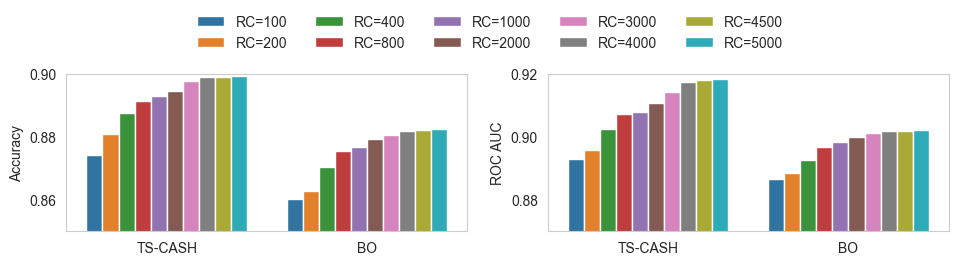

In [7]:
# ID2024112716551923417618
from tshpo.lib_class import FileHelper
import matplotlib.pyplot as plt
import seaborn as sns

# FSM = "PCA"
g = sns.FacetGrid(ana_df_hpo_iteration, col="metric", height=2.5, aspect=2, despine=False, sharey=False)
g.map_dataframe(sns.barplot, x="n_high_performing_model", y="value", hue="variable", palette=sns.color_palette(),
                estimator="mean", ci=None)
ax = None
for _, ax in g.axes_dict.items():
    if str(ax.get_title()).find("AUC") > -1:
        ax.set_ylim(0.87, 0.92)
        ax.set_ylabel("ROC AUC")
    else:
        ax.set_ylabel("Accuracy")
        ax.set_ylim(0.85, 0.9)
    # ax.set_ylim(0.8,0.90)
    ax.set_title(None)
    ax.set_xlabel(None)
    ax.xaxis.set_ticks(ticks=[0, 1], labels=['TS-CASH', "BO"])
    ax.grid(False)
    ax = ax
h, l = ax.get_legend_handles_labels()
l = [str(i).replace("metric_", "RC=") for i in l]
g.add_legend(handles=h, labels=l, bbox_to_anchor=(0.52, 1.03), ncol=5)
# g.add_legend(handles=h, labels=['Accuracy','ROC AUC'], bbox_to_anchor=(0.5, 1.0), ncol=2)
plt.subplots_adjust(wspace=0.20)
# g.savefig("effect_n_iter_on_acc.pdf")
FileHelper().to_pdf(g, "effect_n_iter_on_acc.pdf")